# Ford GoBike Trip Duration per Datetime and User Type   

## Abdulwasiu Tiamiyu

## Investigation Overview

In this investigation, I wanted to take a look at how the duration of trips changes with respect to DateTime and customer type. The main focus was on hours of the day, days of the week and customer type.

## Dataset Overview
The data consists of information regarding approximately 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, and gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude, start and end station unique id among others. About 8000 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

bike =pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike.dropna(inplace=True)

bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

bike['bike_id'] =bike.bike_id.astype(str)


import datetime as dt
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)




bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

In [4]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

## Distribution of Rides by Days

Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.

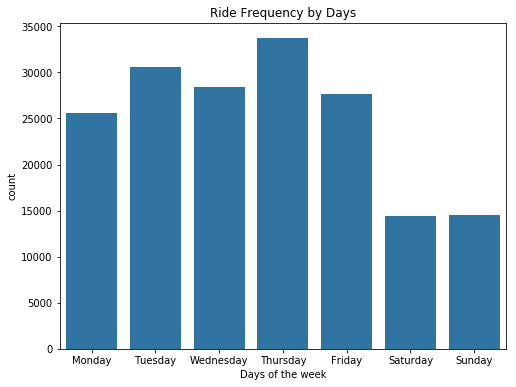

In [5]:
plt.figure(figsize = (8,6))
sb.countplot(data = bike, x = 'start_day', color = sb.color_palette()[0])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

## Distribution of Rides by Hours


The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours where people leave for work and come back later in the evening.

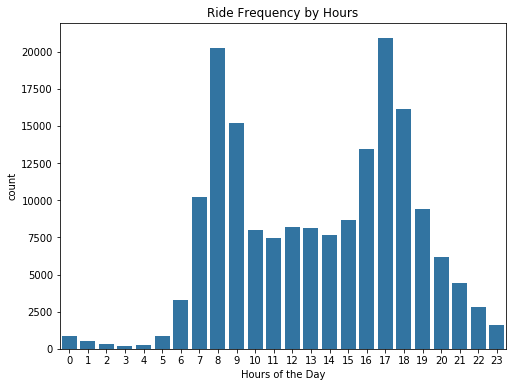

In [6]:
plt.figure(figsize = (8,6))
sb.countplot(data = bike, x = 'start_hr', color = sb.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

## Distribution of Rides by User Type

Subscribers account for over 90% of the total rides

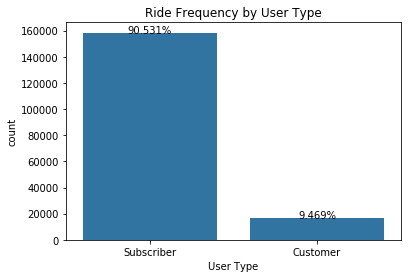

In [7]:
ax = sb.countplot(data = bike, x = 'user_type',  color=sb.color_palette()[0], order=bike.user_type.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type');

## Trip Duration across Days

Weekend trips take a longer duration as compared to trips taken during the week.

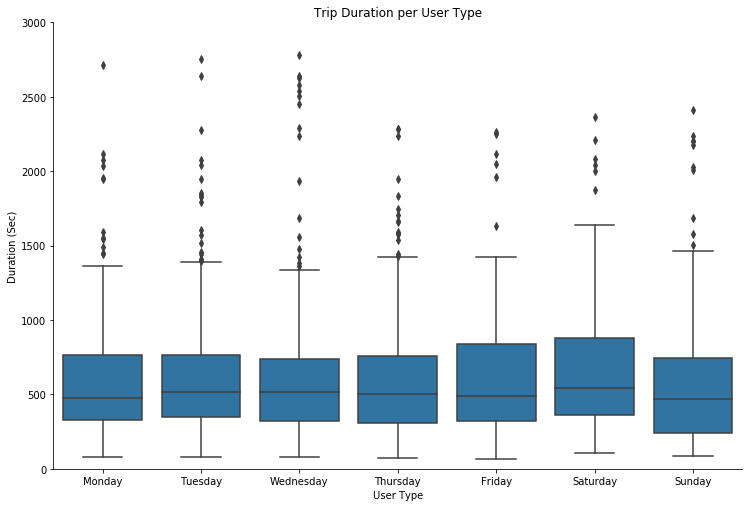

In [8]:
samples = np.random.choice(bike.shape[0], 2000, replace = False)
diamonds_samp = bike.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars =  'start_day',
                size = 7, aspect = 1.5)
g.map(boxgrid)

plt.ylim([0,3000])
plt.xlabel('User Type')
plt.ylabel('Duration (Sec)')
plt.title('Trip Duration per User Type');

## Trip Duration across Customer Types

Customer user type trips take a longer duration than subscriber user type

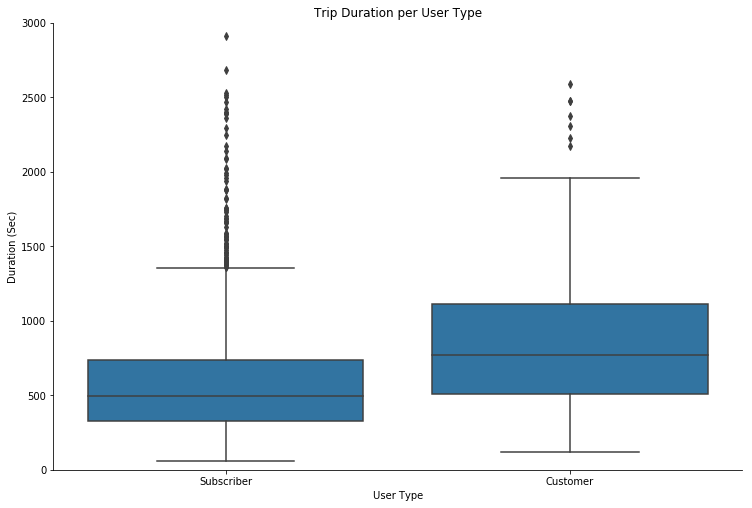

In [9]:
samples = np.random.choice(bike.shape[0], 2000, replace = False)
diamonds_samp = bike.loc[samples,:]

plt.figure(figsize = [6, 6])
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars =  'user_type',
                size = 7, aspect = 1.5)
g.map(boxgrid)
# plt.figure(figsize = [6, 6])

plt.ylim([0,3000])
plt.xlabel('User Type')
plt.title('Trip Duration per User Type')
plt.ylabel('Duration (Sec)');

## Trip Duration across Days and Customer Types


Customer trips take a longer duration regardless of the day of the week(longest on weekends) whereas subscribers generally travel a short distance with a little increase on weekends but not up to that of the customers.

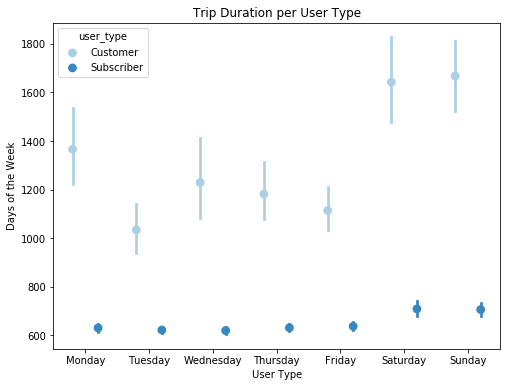

In [10]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('User Type')
plt.ylabel('Days of the Week')
plt.title('Trip Duration per User Type')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [11]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_GoBike_System_Data_Part_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_System_Data_Part_2.ipynb to slides
[NbConvertApp] Writing 368763 bytes to Ford_GoBike_System_Data_Part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_GoBike_System_Data_Part_2.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
